# Problema de Transporte
**Una multinacional que produce componentes electrónicos requiere la demanda de cobre. Y la mejor propuesta que se tiene son las minas en Suramérica, específicamente en Chile, ya que se encuentra una sucursal en dicho país. Se quiere determinar la manera óptima de suministrar la demanda de cobre en minas de Chile.**


## a) Variables de Decisión

Cantidad de cobre a transportar desde cada origen a su correspondiente destino, en (kilotones):

\
*Nemotécnica utilizada y valor de índices origen-destino $(i, j)$:*

* E = Escondida $(1, 1)$
* P = Pelambres $(2, -)$
* C = Collahuasi $(3, 2)$
* T = Teniente $(-, 3)$
* Ch = Chuquicamata $(-, 4)$

$x_{EE}, x_{ECh}, x_{ET}, x_{CC}, x_{CE}, x_{CT}, x_{PE}, x_{PC}, x_{PCh}, x_{PT} $

## b) Función Objetivo y Restricciones

**Función Objetivo**:

$min$ $\sum_{i=1}^{n} \sum_{j=1}^{m} c_{ij}x_{ij} $

Donde $n$ es igual a # de orígenes y $m$ es el # de destinos: n=3 , m=4

$min$ $8x_{EE} + 12x_{ECh} + 24x_{ET}+5x_{CC}+18x_{CE} +33x_{CT}+20x_{PE}+9x_{PC}+20x_{PCh}+32x_{PT} $

<u>Nótese que los costos que no se especifican en el problema se asumen infinitos y se omiten las variables de decisión respectivas de dichos costos. En consecuencia, tampoco aparecen en la función objetivo.</u>

\
**Restricciones**:

1) $x_{EE}+x_{ECh}+x_{ET} \leq 1200 $

2) $x_{CC}+x_{CE}+x_{CT} \leq 1800 $

3) $x_{PE}+x_{PC}+x_{PCh}+x_{PT} \leq 2000 $

4) $x_{ET}+x_{CT}+x_{PT} \geq 1200 $

5) $x_{CC}+x_{PC} \geq 1100 $

6) $x_{EE}+x_{CE}+x_{PE} \geq 900 $

7)$x_{ECh}+x_{PCh} \geq 1000$

8) $x_{EE}, x_{ECh}, x_{ET}, x_{CC}, x_{CE}, x_{CT}, x_{PE}, x_{PC}, x_{PCh}, x_{PT} \geq 0$

\
Si bien en un problema de Programación Lineal como lo es un problema de transporte se emplean igualdades para las restricciones, en este caso al ser un problema desbalanceado (donde $\sum_{i=1}^n a_i \neq \sum_{j=1}^m b_j$), es necesario recurrir a desigualdades. El sentido de estas desigualdades indica que se otorga libertad a los orígenes para retener parte de la producción y a los destinos para recibir más de lo que demandan. De esta manera, se intenta balancear el problema en ambos extremos.

## c) Tabla de costes
Se representa el problema de forma tabular a continuación:

|Origen/Destino|Escondida|Collahuasi|El Teniente|Chuquicamata|Oferta (Kilotones)
|-|-|-|-|-|-|
|**Escondida**|8.00|Inf|24.00|12.00|**1200**|
|**Los Pelambres**|20.00|9.00|32.00|20.00|**2000**|
|**Collahuasi**|18.00|5.00|33.00|Inf|**1800**|
|**Demanda (Kilotones)**|**900**|**1100**|**1200**|**1000**|-|

No es balanceado porque la suma de kilotones la oferta supera a la suma de la demanda total:

**Demanda**: $1200 + 1100 + 900 + 1000 = 4200$ kilotones
\
**Oferta**: $1800 + 2000 + 1200 = 5000$ kilotones


## d) Representación Gráfica del problema

Se utiliza el siguiente grafo para representar el problema de transporte.

Cada nodo del grafo tiene un nombre que corresponde al nombre de dicha mina, ya sea de origen o de destino. Por su parte, el peso de la arista $(i,j)$ corresponde al costo de transporte desde el origen $i$ hasta el destino $j$, es decir, $c_{ij}$.

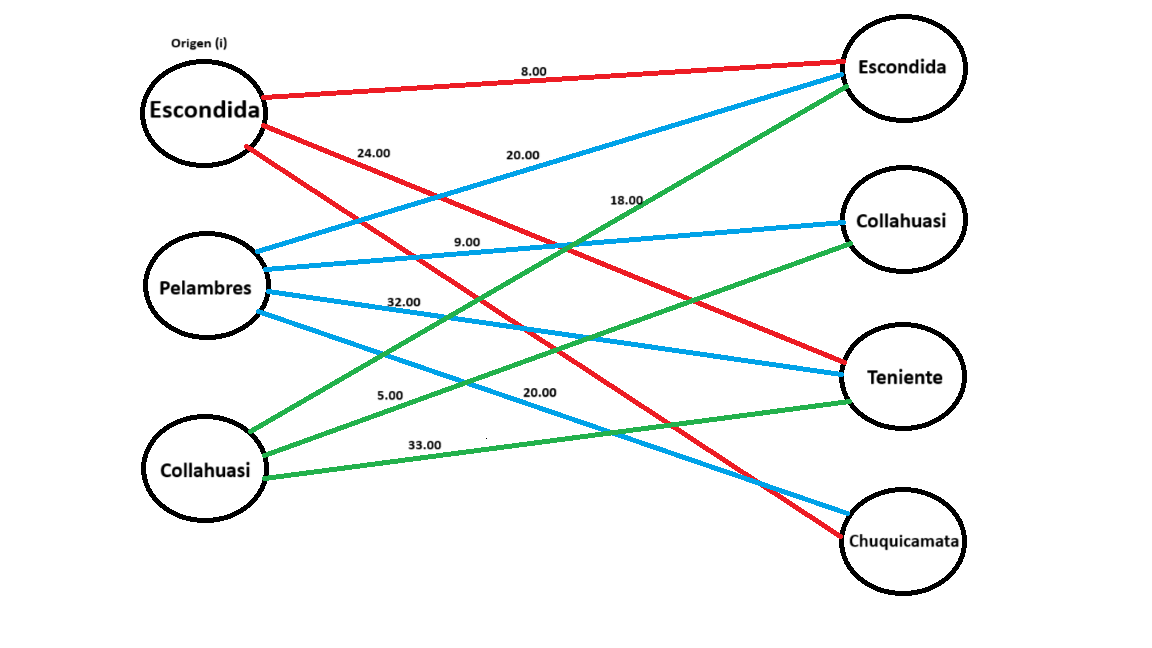

## e) Optimización con Linprog

In [2]:
import numpy as np
import scipy.optimize as opt

# Definir el vector que contendrá las variables de decisión.
numero_origenes = 3
numero_destinos = 4
variables_decision = numero_origenes * numero_destinos
# Orden del vector: Se ignoran variables asociadas a costos Infinitos
# [x_EE, x_ECh, x_ET, x_CC, x_CE, x_CT, x_PE, x_PC, x_PCh, x_PT]
c = [8, 12, 24, 5, 18, 33, 20, 9, 20, 32]

# Definir las restricciones como desigualdades <=
A = [[1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
     [0, 0, -1, 0, 0, -1, 0, 0, 0, -1],
     [0, 0, 0, -1, 0, 0, 0, -1, 0, 0],
     [-1, 0, 0, 0, -1, 0, -1, 0, 0, 0],
     [0, -1, 0, 0, 0, 0, 0, 0, -1, 0]]
b = [1200, 1800, 2000, -1200, -1100, -900, -1000]

# Generar el modelo de optimización con Linprog
res = opt.linprog(c, A, b, bounds=[(0, None) for _ in range(10)],
                  method="revised simplex", options={"disp": True})

# Mostrar el resultado de la optimización
print("Valor mínimo de la función objetivo: ", res.fun)
print("Parámetros óptimos: ", res.x)

Phase Iteration Minimum Slack       Constraint Residual Objective          
1     0         -1200.0             0.0                 0.0                 
1     1         -1200.0             0.0                 7200.0              
1     2         -1200.0             0.0                 10800.0             
1     3         -1200.0             0.0                 16300.0             
1     4         -1200.0             0.0                 31700.0             
1     5         -1200.0             0.0                 31700.0             
1     6         -1000.0             0.0                 38900.0             
1     7         -300.0              0.0                 63400.0             
1     8         0.0                 0.0                 74500.0             
2     8         0.0                 0.0                 74500.0             
2     9         0.0                 0.0                 73000.0             
2     10        0.0                 0.0                 70200.0             


<ipython-input-2-9630bdf949a7>:23: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res = opt.linprog(c, A, b, bounds=[(0, None) for _ in range(10)],


## f) Interpretación de los Resultados

El optimizador de Python arrojó los siguientes resultados para el problema:

* $costo_{total} = 68700$ USD

El valor de cada una de las variables de decisión es:

* $x_{EE} = 900$ kilotones

* $x_{ECh} = 0$ kilotones

* $x_{ET} = 300$ kilotones

* $x_{CC} = 1100$ kilotones

* $x_{CE} = 0$ kilotones

* $x_{CT} = 0$ kilotones

* $x_{PE} = 0$ kilotones

* $x_{PC} = 0$ kilotones

* $x_{PCh} = 1000$ kilotones

* $x_{PT} = 900$ kilotones

\
A la luz de las restricciones, estos valores tienen sentido puesto que respetan el ajuste realizado para intentar balancear el problema con los cambios propuestos. En la siguiente tabla se modela la cantidad de kilotones transportados:

|Origen/Destino|Escondida|Collahuasi|El Teniente|Chuquicamata|Oferta (Kilotones)
|-|-|-|-|-|-|
|**Escondida**|900|0|300|0|**1200**|
|**Los Pelambres**|0|0|900|1000|**1900**|
|**Collahuasi**|0|1100|0|0|**1100**|
|**Demanda (Kilotones)**|**900**|**1100**|**1200**|**1000**|**4200**|

La tabla también demuestra que se alcanzó el balance en el problema pues se llegó a una cantidad total transportada de 4200, correspondiente al límite impuesto por la demanda original. Lo que se redujo fue la oferta, que se refleja en la última columna de la tabla, cuyos valores son siempre menores o iguales a los de la tabla que modelaba el problema original.